# Exercise 2

## Model

There are two kids, they are best friend. They have a PS4 and they want to use their money to buy games together. Their money comes from their parents' income.

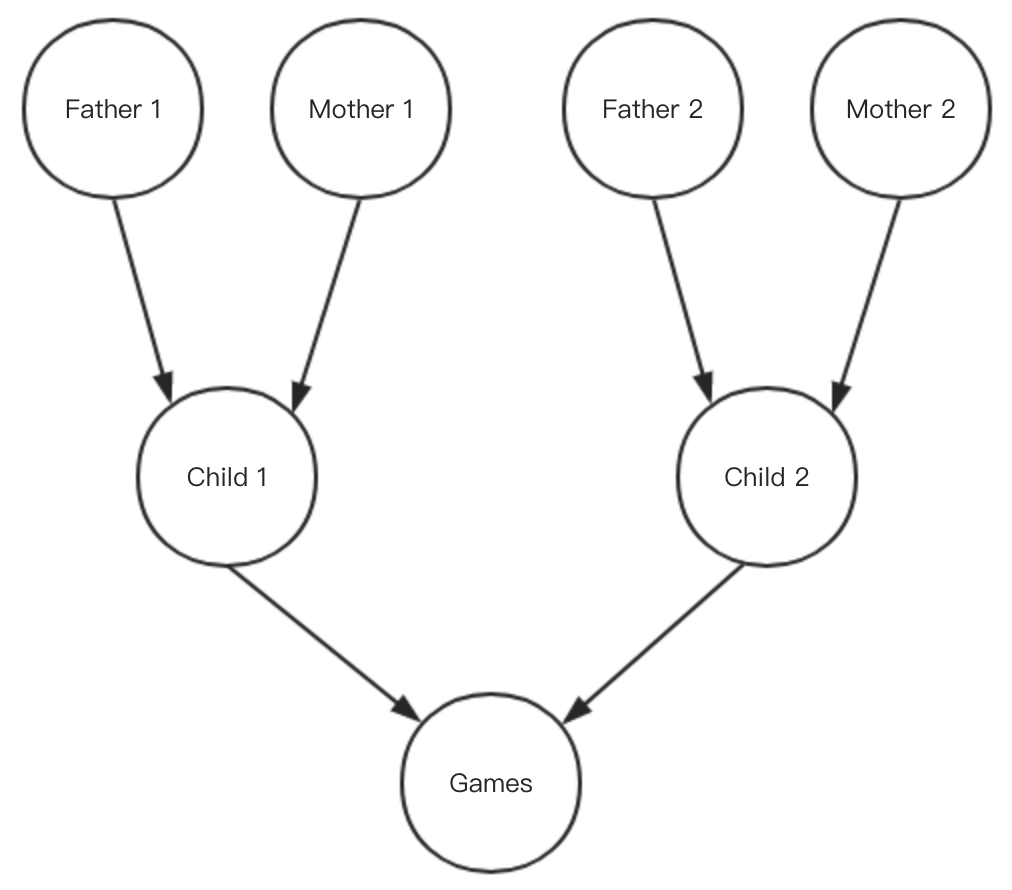

For the first parent, father gives 4% of income to kid and mother gives 5%.  
So the function is  $father1 * 0.04 + mother1 * 0.05$.    
For the second parent, father gives 5% of income to kid and mother gives 6%.  
So the function is  $father2 * 0.05 + mother2 * 0.06$  
And two kids would like to use half of their money to buy games.  
So the function is  $(child1 + child2) /2 $

The income of two parents are sartisified with normal distribution. 

In [1]:
import pymc3
import theano
import numpy

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
nobserve = 1000
#generate 1000 examples of games depends on the model
sigma1f = 500 
sigma1m = 400
sigma2f = 500
sigma2m = 400
sigma1c = 50
sigma2c = 50
sigmag  = 3
# create shared memory for changing observations
obsdata = theano.shared(numpy.zeros(nobserve))

# create the model 
with pymc3.Model() as model:
    father1 = pymc3.Normal('father1', mu=11000, sd=sigma1f)
    mother1 = pymc3.Normal('mother1', mu=6000, sd=sigma1m)
    father2 = pymc3.Normal('father2', mu=7500, sd=sigma2f)
    mother2 = pymc3.Normal('mother2', mu=6000, sd=sigma2m)
    
    # varibles depends on other variables
    child1 = pymc3.Normal('child1', mu=(father1*0.04 + mother1*0.05), sd=sigma1c)
    child2 = pymc3.Normal('child2', mu=(father2*0.05 + mother2*0.06), sd=sigma2c)
    games =  pymc3.Normal('games', mu=(child1 + child2)/2, sd=sigmag, observed=obsdata)

In [3]:
# initialize ground truth with random values
gtruthf1 = numpy.absolute(numpy.random.normal(11000, scale=sigma1f))
gtruthm1 = numpy.absolute(numpy.random.normal(6000, scale=sigma1m))
gtruthf2 = numpy.absolute(numpy.random.normal(7500, scale=sigma2f))
gtruthm2 = numpy.absolute(numpy.random.normal(6000, scale=sigma2m))

gtruthc1 = numpy.absolute(numpy.random.normal((gtruthf1*0.04 + gtruthm1*0.05), scale=sigma1c))
gtruthc2 = numpy.absolute(numpy.random.normal((gtruthf2*0.05 + gtruthm2*0.06), scale=sigma2c))

# print ground truth in output
print('Ground Truth of father1 : ', gtruthf1)
print('Ground Truth of mother1 : ', gtruthm1)
print('Ground Truth of father2 : ', gtruthf2)
print('Ground Truth of mother2 : ', gtruthm2)

# generate data sample with generated parameters
with pymc3.Model() as datamodel:
    d = pymc3.Normal('games', mu=(gtruthc1 + gtruthc2)/2, sd=sigmag)
    # get data by sampling
    trace = pymc3.sample(nobserve, chains=1)
    # set observation data
    obsdata.set_value(trace[d])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Ground Truth of father1 :  11017.093970740949
Ground Truth of mother1 :  5673.197228234191
Ground Truth of father2 :  7804.997442659732
Ground Truth of mother2 :  6181.645997282442


/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [games]
100%|██████████| 1500/1500 [00:01<00:00, 1128.95it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


Here are the posteriors of father1, mother1, father2, mother2, child1 and child2.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Sequential sampling (1 chains in 1 job)
NUTS: [child2, child1, mother2, father2, mother1, father1]
100%|██████████| 1500/1500 [02:10<00:00, 11.45it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


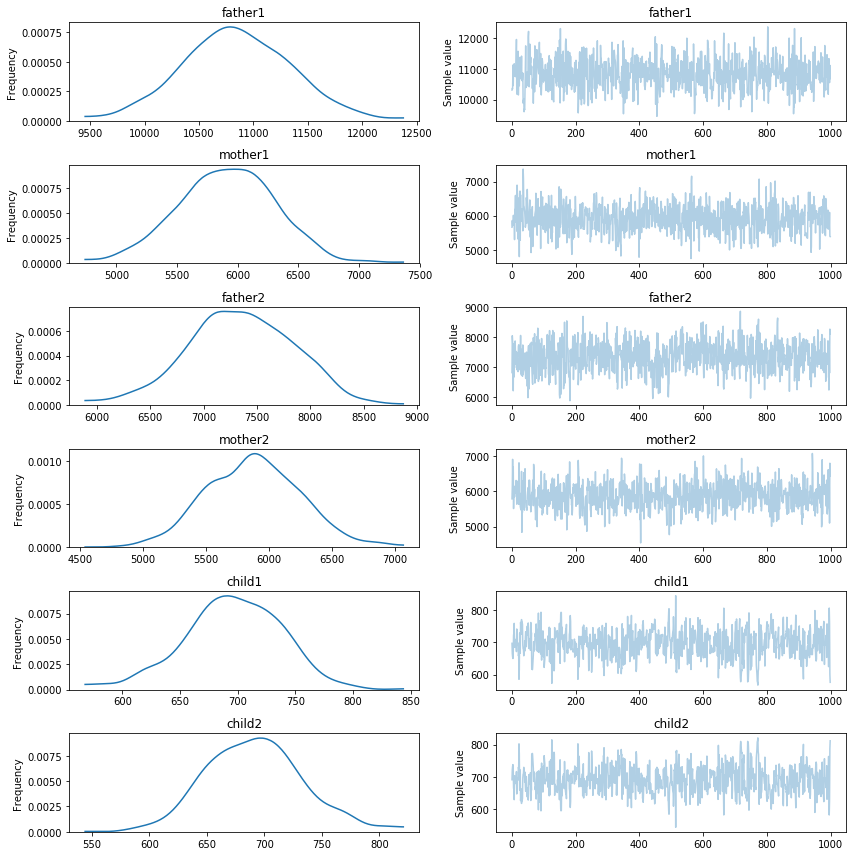

In [4]:
%matplotlib inline

nsamples = 1000
# sampling the model with given data
with model:
    # get sample from model with given observed data
    trace = pymc3.sample(nsamples, chains=1)
    # illustrate samples
    pymc3.traceplot(trace)

I will show the value father1, mother1, father2, mother2, child1 and child2 who has the biggest posterior.

In [5]:
with model:
    maps = pymc3.find_MAP()
print(maps)

logp = -2,633.8, ||grad|| = 0.0004715: 100%|██████████| 26/26 [00:00<00:00, 2208.42it/s]  

{'father1': array(10875.54000028), 'mother1': array(5900.81023725), 'father2': array(7344.45890818), 'mother2': array(5880.9299586), 'child1': array(698.97744517), 'child2': array(688.99428332)}
